# this file does statistical analysis on neighbor effects on logging concessions as well as multiple linear regression of features vs. deforestation 



In [1]:
# imports

import numpy as np
import matplotlib as mpl
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sn

import descartes


In [2]:
gdf = gpd.read_file("data/Managed_Forest_Concessions_(WRI).geojson")
# gdf = gpd.read_file("mock/mock_concessions.geojson")

# method 1
Logging correlation vs other logging (vector of deforestation for each concession times number of neighbors for each). 

In [3]:
defor_cumul_prop_arr = np.array([pd.read_csv("outputs/features_by_logging_concession.csv")['defor_cumul_prop']])
defor_cumul_prop_avg_arr = np.array([pd.read_csv("outputs/features_by_logging_concession.csv")['defor_cumul_prop_avg']])
# import adjacency matrix
adj_mat = np.array(pd.read_csv("outputs/logging_concession_adjacencies_no_buffer.csv", header=None))

print(len(defor_cumul_prop_avg_arr.T), len(adj_mat))

557 557


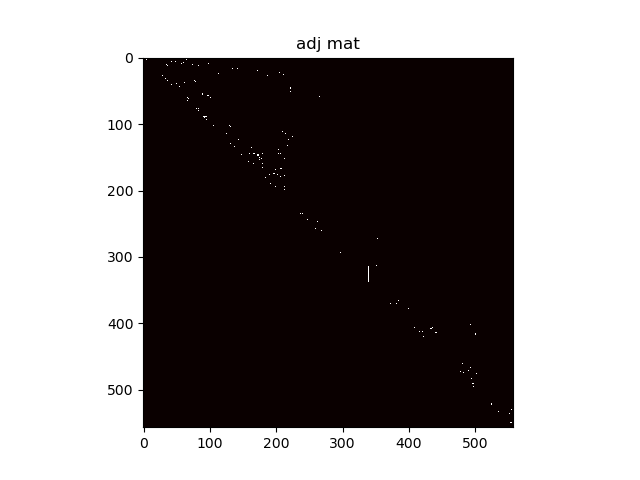

In [4]:
#4/2 take only upper triangular of the adj matrix because its symmetric and otherwise are double counting things
adj_mat_upper_tri = np.copy(adj_mat)
for i in range(len(adj_mat)):
    for j in range(len(adj_mat)):
        if j < i:
            adj_mat_upper_tri[i, j] = 0


%matplotlib widget
plt.imshow(adj_mat_upper_tri, cmap='hot', interpolation='nearest')
plt.title("adj mat")
plt.show()

In [5]:
arr =np.array([0,0,1,0,1])
vals = np.array([1,2,3,4,5])
boolarr = list(map(bool, arr))
boolarr = [not a for a in boolarr]
print(boolarr)
vals[boolarr]

[True, True, False, True, False]


array([1, 2, 4])

In [6]:
defor_cumul_prop_avg_arr = defor_cumul_prop_avg_arr[0]

In [7]:
x = []
y = []

for i, row in enumerate(adj_mat_upper_tri):
    #print(sum(row))
    #print(i, defor_cumul_prop_avg_arr.T[i])
    boolrow = list(map(bool, row))
    #boolrow = [not a for a in boolrow] # plot non adj

    neighbors = defor_cumul_prop_avg_arr[boolrow]
    #print(sum(row), len(neighbors))
    #print(neighbors)
    y.append( neighbors )
    x.append( [defor_cumul_prop_avg_arr.T[i]] * len(neighbors) )

x = np.nan_to_num(np.concatenate(x), nan = 0.0)
y = np.nan_to_num(np.concatenate(y), nan = 0.0)
print(len(x))
print(len(y))


422
422


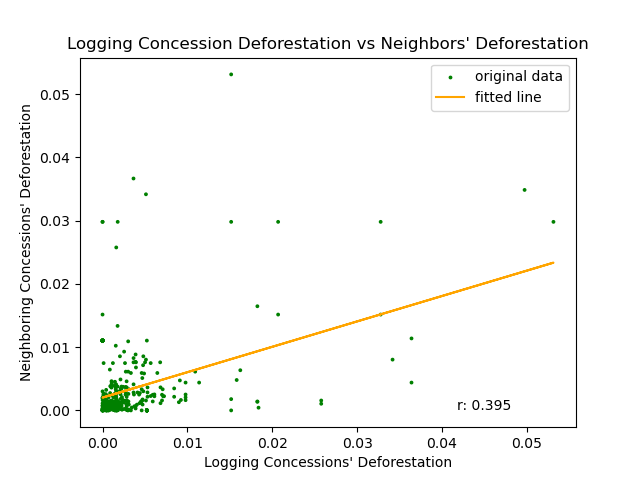

In [8]:
# 3/13 
%matplotlib widget
from scipy import stats


%matplotlib widget


plt.scatter(x, y, s=[3]*len(x), c='green', label="original data")
slope, intercept, r, p, se = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, 'orange', label='fitted line')
plt.legend()

plt.title("Logging Concession Deforestation vs Neighbors' Deforestation")
plt.xlabel("Logging Concessions' Deforestation")
plt.ylabel("Neighboring Concessions' Deforestation")
r = round(stats.pearsonr(x, y)[0],3)
plt.text(s="r: " + str(r), x=max(x*5.5/7), y=0)

# return r
plt.show()

In [14]:
# run cell 39 for this function
run_OLS(x, y)

RSS:  0.013


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     77.75
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.14e-17
Time:                        10:18:44   Log-Likelihood:                 1586.1
No. Observations:                 422   AIC:                            -3168.
Df Residuals:                     420   BIC:                            -3160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.000      6.474      0.000       0.001       0.003
x1             0.4015      0.046      8.818      0.000       0.312       0.491
==============================================================================
Omnibus:                      349.065   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6469.047
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      20.847   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# date: 4/2
# import data
# we will do subsets of the data based on the following features
# area	year	slope	elev	distroad	distcapital	peatdepth	biomasscarbonruesch	soilcarbon	biomasscarbonbaccini
all_features = pd.read_csv("outputs/features_by_logging_concession.csv")
geo_features = all_features.iloc[:,[1, 3, 4, 5, 6, 7, 8, 9, 10]]
geo_features['slope'].describe()


count    532.000000
mean       8.046060
std        5.090871
min        0.789777
25%        3.406882
50%        7.938673
75%       11.646931
max       22.168293
Name: slope, dtype: float64

422
422


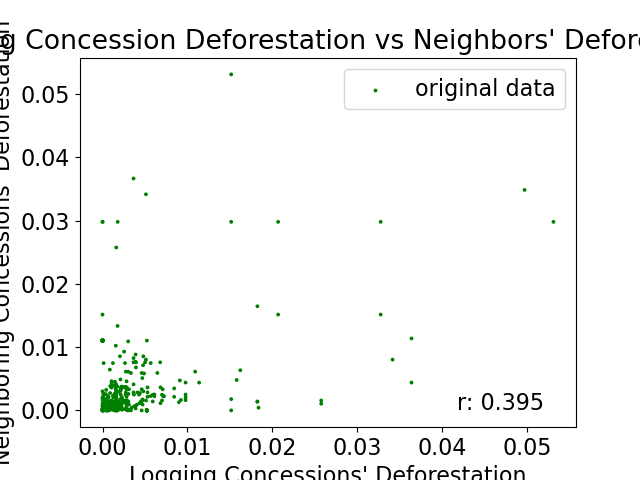

RSS:  0.013


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     77.75
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.14e-17
Time:                        10:26:21   Log-Likelihood:                 1586.1
No. Observations:                 422   AIC:                            -3168.
Df Residuals:                     420   BIC:                            -3160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.000      6.474      0.000       0.001       0.003
x1             0.4015      0.046      8.818      0.000       0.312       0.491
==============================================================================
Omnibus:                      349.065   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6469.047
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      20.847   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
plt.rcParams.update({'font.size': 16})

def plot_logging_vs_neighbor_logging_deforestation(mask = None, title="Logging Concession Deforestation vs Neighbors' Deforestation"):
    """
    function for pre-nicely formated plots
    """
    if mask is None:
        mask = [True]*len(adj_mat)

    x = []
    y = []

    for i, row in enumerate(adj_mat_upper_tri):
        if mask[i]: 
            #print(sum(row))
            #print(i, defor_cumul_prop_avg_arr.T[i])
            boolrow = list(map(bool, row))
            #print(len(boolrow))
            neighbors = defor_cumul_prop_avg_arr[boolrow]
            #print(sum(row), len(neighbors))
            #print(neighbors)
            y.append( neighbors )
            x.append( [defor_cumul_prop_avg_arr.T[i]] * len(neighbors) )

    x = np.nan_to_num(np.concatenate(x), nan = 0.0)
    y = np.nan_to_num(np.concatenate(y), nan = 0.0)
    print(len(x))
    print(len(y))

    slope, intercept, r, p, se = stats.linregress(x, y)
    plt.plot(x, intercept + slope*x, 'orange', label='fitted line')

    %matplotlib widget

    plt.scatter(x, y, s=[3]*len(x), c='green', label="original data")
    plt.legend()
    plt.title(title)
    plt.xlabel("Logging Concessions' Deforestation")
    plt.ylabel("Neighboring Concessions' Deforestation")
    r = round(stats.pearsonr(x, y)[0],3)
    plt.text(s="r: " + str(r), x=max(x*5.5/7), y=0)
    # return r
    plt.show()

    return run_OLS(x, y)

res = plot_logging_vs_neighbor_logging_deforestation()
res


In [21]:
def conditional_logging_vs_neighbor_logging_deforestation_table(feature):
    """
    prints a markdown table results of running regresstion of defor vs. neighbor defor with a mask based on 
    the value (based on percentile) of a certain feature
        specifically, tests the percentile ranges for [0, .25], [0, .5], [0, .75], [0, 1], [.25, .5], [.25, .75], [.25, 1], [.5, .75], [.5, 1], [.75, 1]
    """
    scores = '### Feature: ' + feature + '\n| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |\n| ----- | ----- | - | - | - | - | - | - |\n'
    for low_threshold in np.arange(0, 1, .25):
        for high_threshold in np.arange(low_threshold + .25, 1.25, .25):
            x = []
            y = []


            mask = np.where((geo_features[feature] >= geo_features[feature].quantile(low_threshold)) & \
                            (geo_features[feature] <= geo_features[feature].quantile(high_threshold)), True, False)
            for i, row in enumerate(adj_mat_upper_tri):
                if mask[i]: 
                    #print(sum(row))
                    #print(i, defor_cumul_prop_avg_arr.T[i])
                    boolrow = list(map(bool, row))
                    #print(len(boolrow))
                    neighbors = defor_cumul_prop_avg_arr[boolrow]
                    #print(sum(row), len(neighbors))
                    #print(neighbors)
                    y.append( neighbors )
                    x.append( [defor_cumul_prop_avg_arr.T[i]] * len(neighbors) )

            x = np.nan_to_num(np.concatenate(x), nan = 0.0)
            y = np.nan_to_num(np.concatenate(y), nan = 0.0)
            #print(len(x))
            #print(len(y))
            slope, intercept, r, p, se = stats.linregress(x, y)
            # try:
            #     r = round(stats.pearsonr(x, y)[0],3)
            # except ValueError:
            #     r = np.NaN
            #lopes.append(((low_threshold, high_threshold), len(x), r))
            scores += '| [' + str(low_threshold) + ", " + str(high_threshold) + "] | " + str(len(x)) + " | " + str(round(r,3)) + " | " + str(round(r**2,3)) + " | " + str(round(p,4)) + " | "  + str(round(slope,3)) + " | " + str(round(se,3)) + " |\n"
    return scores
    #slopes.append(temp)

# area	year	slope	elev	distroad	distcapital	peatdepth	biomasscarbonruesch	soilcarbon	biomasscarbonbaccini

print(conditional_logging_vs_neighbor_logging_deforestation_table("biomasscarbonruesch"))

### Feature: biomasscarbonruesch
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 82 | 0.519 | 0.269 | 0.0 | 0.581 | 0.107 |
| [0.0, 0.5] | 186 | 0.422 | 0.178 | 0.0 | 0.454 | 0.072 |
| [0.0, 0.75] | 312 | 0.423 | 0.179 | 0.0 | 0.463 | 0.056 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 |
| [0.25, 0.5] | 104 | 0.291 | 0.085 | 0.0027 | 0.303 | 0.099 |
| [0.25, 0.75] | 230 | 0.341 | 0.116 | 0.0 | 0.372 | 0.068 |
| [0.25, 1.0] | 338 | 0.307 | 0.094 | 0.0 | 0.3 | 0.051 |
| [0.5, 0.75] | 126 | 0.406 | 0.165 | 0.0 | 0.474 | 0.096 |
| [0.5, 1.0] | 234 | 0.309 | 0.095 | 0.0 | 0.286 | 0.058 |
| [0.75, 1.0] | 108 | 0.163 | 0.026 | 0.0924 | 0.104 | 0.061 |



(date 4/2, updated 4/7 w/ R^2, p-value, slope / slope std err)

## Results:
- rows with high r values are bolded, relatively higher values are italicized
- commentary on the rightmost column 
- r = .395 with no slicing

### Feature: slope
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 94 | **0.45** | 0.203 | 0.0 | 0.446 | 0.092 |
| [0.0, 0.5] | 231 | 0.383 | 0.146 | 0.0 | 0.372 | 0.059 |
| [0.0, 0.75] | 356 | 0.384 | 0.147 | 0.0 | 0.391 | 0.05 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 137 | 0.356 | 0.127 | 0.0 | 0.337 | 0.076 |
| [0.25, 0.75] | 262 | 0.348 | 0.121 | 0.0 | 0.351 | 0.059 |
| [0.25, 1.0] | 326 | 0.359 | 0.129 | 0.0 | 0.358 | 0.052 |
| [0.5, 0.75] | 125 | 0.237 | 0.056 | 0.0078 | 0.379 | 0.14 |
| [0.5, 1.0] | 189 | 0.259 | 0.067 | 0.0003 | 0.379 | 0.103 |
| [0.75, 1.0] | 64 | 0.401 | 0.161 | 0.001 | 0.319 | 0.092 | r is higher here but looks more spread out / trend is not as tight |

### Feature: area
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 78 | *0.422* | 0.178 | 0.0001 | 0.35 | 0.086 | clump on 0 |
| [0.0, 0.5] | 154 | *0.423* | 0.179 | 0.0 | 0.378 | 0.066 |
| [0.0, 0.75] | 281 | *0.439* | 0.193 | 0.0 | 0.415 | 0.051 |
| [0.0, 1.0] | 422 | 0.395 | 0.156 | 0.0 | 0.402 | 0.046 | full data |
| [0.25, 0.5] | 76 | *0.457* | 0.209 | 0.0 | 0.367 | 0.083 | scattered |
| [0.25, 0.75] | 203 | **0.513** | 0.263 | 0.0 | 0.498 | 0.059 |
| [0.25, 1.0] | 344 | 0.399 | 0.159 | 0.0 | 0.435 | 0.054 |
| [0.5, 0.75] | 127 | **0.523** | 0.273 | 0.0 | 0.522 | 0.076 |
| [0.5, 1.0] | 268 | 0.396 | 0.156 | 0.0 | 0.44 | 0.063 | flat/spread out |
| [0.75, 1.0] | 141 | 0.315 | 0.099 | 0.0001 | 0.374 | 0.096 | flat/spread out |


### Feature: elev
Observations: lower elev -> higher rate of defor. However not super strong trends.
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 100 | **0.435** | 0.19 | 0.0 | 0.406 | 0.085 | not super tight |
| [0.0, 0.5] | 223 | 0.357 | 0.127 | 0.0 | 0.357 | 0.063 |
| [0.0, 0.75] | 357 | 0.389 | 0.151 | 0.0 | 0.398 | 0.05 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 123 | 0.316 | 0.1 | 0.0004 | 0.333 | 0.091 |
| [0.25, 0.75] | 257 | 0.356 | 0.127 | 0.0 | 0.376 | 0.062 |
| [0.25, 1.0] | 320 | 0.359 | 0.129 | 0.0 | 0.372 | 0.054 |
| [0.5, 0.75] | 134 | 0.277 | 0.077 | 0.0012 | 0.474 | 0.143 |
| [0.5, 1.0] | 197 | 0.214 | 0.046 | 0.0025 | 0.272 | 0.089 |
| [0.75, 1.0] | 63 | 0.133 | 0.018 | 0.2969 | 0.09 | 0.086 | clustered near zero, low values overall |


### Feature: distroad
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 86 | **0.479** | 0.23 | 0.0 | 0.304 | 0.061 | kind of scattered |
| [0.0, 0.5] | 221 | 0.371 | 0.138 | 0.0 | 0.304 | 0.051 |
| [0.0, 0.75] | 337 | 0.386 | 0.149 | 0.0 | 0.39 | 0.051 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 135 | 0.337 | 0.114 | 0.0001 | 0.278 | 0.067 |
| [0.25, 0.75] | 251 | 0.37 | 0.137 | 0.0 | 0.38 | 0.061 |
| [0.25, 1.0] | 334 | 0.386 | 0.149 | 0.0 | 0.4 | 0.053 |
| [0.5, 0.75] | 116 | **0.416** | 0.173 | 0.0 | 0.525 | 0.107 | a bit tighter |
| [0.5, 1.0] | 199 | **0.436** | 0.191 | 0.0 | 0.55 | 0.081 |
| [0.75, 1.0] | 83 | 0.359 | 0.129 | 0.0008 | 0.417 | 0.12 | very scattered |



### Feature: distcapital
Observations: lower distance to capital -> higher rate of defor. However not super strong trends.
Notably, higher than median intervals have low correlations

| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 76 | **0.422** | 0.178 | 0.0001 | 0.415 | 0.104 | mildly scattered |
| [0.0, 0.5] | 225 | *0.407* | 0.165 | 0.0 | 0.422 | 0.063 |
| [0.0, 0.75] | 342 | 0.386 | 0.149 | 0.0 | 0.394 | 0.051 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 149 | -0.332 | 0.11 | 0.0 | -0.594 | 0.139 | low cluster - small x range |
| [0.25, 0.75] | 266 | -0.002 | 0.0 | 0.968 | -0.003 | 0.071 |
| [0.25, 1.0] | 344 | 0.023 | 0.001 | 0.6749 | 0.025 | 0.06 |
| [0.5, 0.75] | 117 | 0.18 | 0.032 | 0.0526 | 0.16 | 0.082 |
| [0.5, 1.0] | 195 | 0.184 | 0.034 | 0.01 | 0.158 | 0.061 |
| [0.75, 1.0] | 78 | 0.136 | 0.018 | 0.2365 | 0.082 | 0.069 |


### Feature: peatdepth
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 307 | **0.475** | 0.225 | 0.0 | 0.468 | 0.05 |
| [0.0, 0.5] | 307 | **0.475** | 0.225 | 0.0 | 0.468 | 0.05 | decent trend |
| [0.0, 0.75] | 315 | **0.469** | 0.22 | 0.0 | 0.452 | 0.048 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 307 | **0.475** | 0.225 | 0.0 | 0.468 | 0.05 |
| [0.25, 0.75] | 315 | **0.469** | 0.22 | 0.0 | 0.452 | 0.048 |
| [0.25, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 |
| [0.5, 0.75] | 315 | **0.469** | 0.22 | 0.0 | 0.452 | 0.048 |
| [0.5, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 |
| [0.75, 1.0] | 105 | -0.408 | 0.166 | 0.0 | -0.87 | 0.192 |


### Feature: soilcarbon
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 114 | 0.472 | 0.222 | 0.0 | 0.414 | 0.073 |
| [0.0, 0.5] | 228 | **0.574** | 0.33 | 0.0 | 0.475 | 0.045 | decent trend |
| [0.0, 0.75] | 307 | 0.503 | 0.253 | 0.0 | 0.458 | 0.045 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 |
| [0.25, 0.5] | 114 | **0.82** | 0.672 | 0.0 | 0.578 | 0.038 | high r but there are no high values in this interval
| [0.25, 0.75] | 193 | **0.524** | 0.274 | 0.0 | 0.489 | 0.057 |
| [0.25, 1.0] | 306 | 0.359 | 0.129 | 0.0 | 0.395 | 0.059 |
| [0.5, 0.75] | 79 | 0.394 | 0.155 | 0.0003 | 0.408 | 0.108 |
| [0.5, 1.0] | 192 | 0.233 | 0.054 | 0.0012 | 0.286 | 0.087 |
| [0.75, 1.0] | 113 | -0.312 | 0.097 | 0.0008 | -0.793 | 0.229 |


### Feature: biomasscarbonruesch
| Range | # pts | r | R^2 | p-value | slope | slope stderr | comments |
| ----- | ----- | - | - | - | - | - | - |
| [0.0, 0.25] | 82 | **0.519** | 0.269 | 0.0 | 0.581 | 0.107 | not the tightest trend |
| [0.0, 0.5] | 186 | *0.422* | 0.178 | 0.0 | 0.454 | 0.072 |
| [0.0, 0.75] | 312 | *0.423* | 0.179 | 0.0 | 0.463 | 0.056 |
| [0.0, 1.0] | 420 | 0.394 | 0.156 | 0.0 | 0.401 | 0.046 | full data |
| [0.25, 0.5] | 104 | 0.291 | 0.085 | 0.0027 | 0.303 | 0.099 |
| [0.25, 0.75] | 230 | 0.341 | 0.116 | 0.0 | 0.372 | 0.068 |
| [0.25, 1.0] | 338 | 0.307 | 0.094 | 0.0 | 0.3 | 0.051 |
| [0.5, 0.75] | 126 | *0.406* | 0.165 | 0.0 | 0.474 | 0.096 |
| [0.5, 1.0] | 234 | 0.309 | 0.095 | 0.0 | 0.286 | 0.058 |
| [0.75, 1.0] | 108 | 0.163 | 0.026 | 0.0924 | 0.104 | 0.061 |


### Feature: biomasscarbonbaccini
Observations: above avg biomass carbon --> lower correlations
| Range | # pts | r | comments |
| ----- | ----- | - | - |
| [0.0, 0.25] | 91 | **0.445** |
| [0.0, 0.5] | 176 | 0.358 |
| [0.0, 0.75] | 279 | 0.373 |
| [0.0, 1.0] | 420 | 0.394 | full data |
| [0.25, 0.5] | 85 | 0.015 |
| [0.25, 0.75] | 188 | 0.076 |
| [0.25, 1.0] | 329 | 0.172 |
| [0.5, 0.75] | 103 | 0.121 |
| [0.5, 1.0] | 244 | 0.24 |
| [0.75, 1.0] | 141 | **0.47** | very much clumped at zero/near-zero


(4/2)

86
86


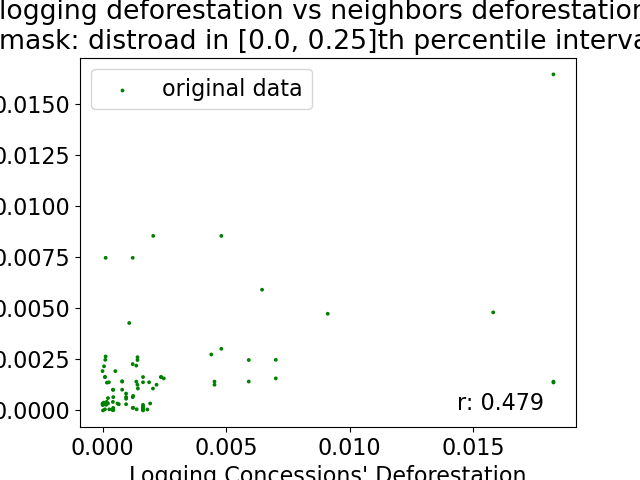

RSS:  0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     25.06
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.02e-06
Time:                        10:28:29   Log-Likelihood:                 406.38
No. Observations:                  86   AIC:                            -808.8
Df Residuals:                      84   BIC:                            -803.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.573      0.001       0.000       0.002
x1             0.3044      0.061      5.006      0.000       0.183       0.425
==============================================================================
Omnibus:                       56.375   Durbin-Watson:                   2.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.575
Skew:                           2.105   Prob(JB):                     5.75e-53
Kurtosis:                      10.030   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# plot custom feature / subset slices with detailed OLS summary output
feature = 'distroad'
low_threshold, high_threshold = .0, 0.25
mask = np.where((geo_features[feature] >= geo_features[feature].quantile(low_threshold)) & \
                            (geo_features[feature] <= geo_features[feature].quantile(high_threshold)), True, False)
plot_logging_vs_neighbor_logging_deforestation(mask, title = "logging deforestation vs neighbors deforestation.\nmask: " + feature + " in [" + str(low_threshold) + ", " + str(high_threshold) + "]th percentile interval")


422
422


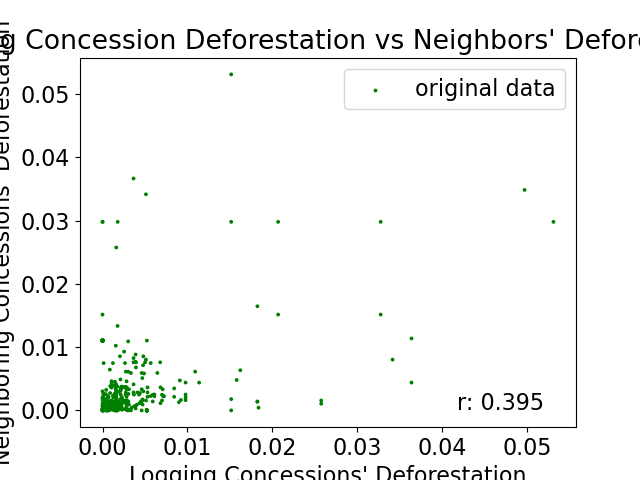

RSS:  0.013


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     77.75
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.14e-17
Time:                        10:28:37   Log-Likelihood:                 1586.1
No. Observations:                 422   AIC:                            -3168.
Df Residuals:                     420   BIC:                            -3160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.000      6.474      0.000       0.001       0.003
x1             0.4015      0.046      8.818      0.000       0.312       0.491
==============================================================================
Omnibus:                      349.065   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6469.047
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      20.847   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# plot full dataset
plot_logging_vs_neighbor_logging_deforestation()

# feature vs deforestation analysis

In [25]:

def feature_vs_deforestation_linregress_data_table():
    """
    print markdown table of results of regression for 
    # [value of geographical feature for concession X] vs [deforestation of X], using normalized vectors 
    """
    features = ["area",	"year",	"slope"	,"elev"	,"distroad", "distcapital", "peatdepth", "biomasscarbonruesch", "soilcarbon", "biomasscarbonbaccini"]

    scores = 'Feature | r | R^2 | p-value | m | b | m stderr | comments |\n| - | - | - | - | - | - | - | - |\n'
    
    y = defor_cumul_prop_avg_arr
    mask = ~np.isnan(y)
    y_normed = (y[mask] - np.average(y[mask])) / np.linalg.norm(y[mask])
    print(np.average(y[mask]), np.linalg.norm(y[mask]))

    print(len(y[mask]))
    for feature in features:
        x = np.array([pd.read_csv("outputs/features_by_logging_concession.csv")[feature]][0])
        x_normed = (x[mask] - np.average(x[mask])) / np.linalg.norm(x[mask])

        slope, intercept, r, p, se = stats.linregress(x_normed, y_normed)

        scores += "| " + feature + " | " + str(round(r,3)) + " | " + str(round(r**2,3)) + " | " + str(round(p,4)) + " | "  + str(round(slope,5)) + " | " + str(round(intercept,3)) + " | " + str(round(se,3)) + " |\n"
    return scores

print(feature_vs_deforestation_linregress_data_table())

0.003954768071937227 0.18640259832522754
495
Feature | r | R^2 | p-value | m | b | m stderr | comments |
| - | - | - | - | - | - | - | - |
| area | -0.084 | 0.007 | 0.0606 | -0.09555 | 0.0 | 0.051 |
| year | -0.016 | 0.0 | 0.7296 | -4.13017 | -0.0 | 11.942 |
| slope | -0.227 | 0.051 | 0.0 | -0.39442 | -0.0 | 0.076 |
| elev | -0.091 | 0.008 | 0.0424 | -0.08931 | 0.0 | 0.044 |
| distroad | -0.189 | 0.036 | 0.0 | -0.22709 | 0.0 | 0.053 |
| distcapital | -0.284 | 0.08 | 0.0 | -0.52381 | 0.0 | 0.08 |
| peatdepth | 0.007 | 0.0 | 0.8831 | 0.00592 | 0.0 | 0.04 |
| biomasscarbonruesch | -0.229 | 0.053 | 0.0 | -1.12121 | 0.0 | 0.214 |
| soilcarbon | -0.094 | 0.009 | 0.0363 | -0.09359 | 0.0 | 0.045 |
| biomasscarbonbaccini | -0.267 | 0.071 | 0.0 | -1.13011 | -0.0 | 0.184 |



### Results of regression on [value of geographical feature for concession x] vs [deforestation of X], using normalized vectors

Feature | r | R^2 | p-value | m | b | m stderr | comments |
| - | - | - | - | - | - | - | - |
| area | -0.084 | 0.007 | 0.0606 | -0.09555 | 0.024 | 0.051 |
| year | -0.016 | 0.0 | 0.7296 | -4.13017 | 0.207 | 11.942 | p too high to be informative |
| slope | **-0.227** | 0.051 | 0.0 | -0.39442 | 0.036 | 0.076 |
| elev | -0.091 | 0.008 | 0.0424 | -0.08931 | 0.023 | 0.044 |
| distroad | **-0.189** | 0.036 | 0.0 | -0.22709 | 0.028 | 0.053 | 
| distcapital | **-0.284** | 0.08 | 0.0 | -0.52381 | 0.042 | 0.08 |
| peatdepth | 0.007 | 0.0 | 0.8831 | 0.00592 | 0.021 | 0.04 | p too high to be informative |
| biomasscarbonruesch | **-0.229** | 0.053 | 0.0 | -1.12121 | 0.071 | 0.214 |
| soilcarbon | -0.094 | 0.009 | 0.0363 | -0.09359 | 0.023 | 0.045 |
| biomasscarbonbaccini | **-0.267** | 0.071 | 0.0 | -1.13011 | 0.071 | 0.184 |

date: 4/7

note: A key mathematical property of the Pearson correlation coefficient is that it is invariant under separate changes in location and scale in the two variables.

## Method 3 for analyzing neighboring effects
take deforestation of self vs avg score of neighbors


In [26]:
## MEASURE 3

# pairwise sum of geom areas
areas_arr = np.array([gdf.loc[:, "geometry"].length]) # shape (1, 557)
areas_sum_arr = areas_arr +  areas_arr.T # shape (557, 557)

# interaction measure 3: distance between all pairs of centroids
pair_centroid_dist_mat = []
centroids = np.array([polygon.centroid for polygon in gdf.loc[:, "geometry"]])
for c1 in centroids:
    row  = [c1.distance(c2) for c2 in centroids] # distance btwn c1 and every other centroid
    pair_centroid_dist_mat.append(row)
pair_centroid_dist_mat = np.array(pair_centroid_dist_mat)

# boundary-perim interaction measure as defined above
area_dist_measure = areas_sum_arr / pair_centroid_dist_mat
area_dist_squared_measure = areas_sum_arr / (pair_centroid_dist_mat ** 2) # dimensionless

def convert_2darr_to_1darr_uppertri(mat):
    triu_inds = np.triu_indices(n=len(mat), k=1)
    res = mat[triu_inds] # take upper triangulars (i.e. all unique pairs)
    print(len(res))
    return res

#area_dist_measure = np.nan_to_num(convert_2darr_to_1darr_uppertri(area_dist_measure), copy=True, posinf = 75) # 
#area_only_measure = np.nan_to_num(convert_2darr_to_1darr_uppertri(areas_sum_arr), copy=True)
#centroid_dist_only_measure = np.nan_to_num(convert_2darr_to_1darr_uppertri(1/pair_centroid_dist_mat), copy=True)
#area_dist_squared_measure = np.nan_to_num(convert_2darr_to_1darr_uppertri(area_dist_squared_measure), copy=True, posinf = 75) # 


C:\Users\szhan\AppData\Local\Temp\ipykernel_30904\538331965.py:9: FutureWarning: The input object of type 'Point' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Point', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  centroids = np.array([polygon.centroid for polygon in gdf.loc[:, "geometry"]])
C:\Users\szhan\AppData\Local\Temp\ipykernel_30904\538331965.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  centroids = np.array([polygon.centroid for polygon in gdf.loc[:, "g

In [27]:
x = defor_cumul_prop_avg_arr.T
y = []

for i, row in enumerate(adj_mat):
    #print(sum(row))
    #print(i, defor_cumul_prop_avg_arr.T[i])
    #boolrow = list(map(bool, row))
    #print(len(boolrow))
    neighbors = []
    for j, val in enumerate(row):
        if val == 1:
            neighbors.append(area_dist_measure[i, j])

    #print(sum(row), len(neighbors))
    #print(neighbors)
    y.append( np.average(neighbors) )
print(y)

[9.437426461885432, 9.730630025853614, 14.883214264411777, 18.48041021247454, 13.950332458177819, 14.637044925812042, 15.958970727343603, 15.569520728755673, 11.935972363295502, 10.573103402952734, 14.254086915720283, 18.033538449562794, 12.907679861776085, 10.768024926656091, 17.776867944206895, 14.236985690312343, 7.017407280652356, 12.097154292051878, nan, 10.303506777093936, 11.404945095680178, 17.643610000474194, 22.557620477900834, 9.424560559732573, 14.290653768596757, nan, 8.099138458083777, 9.64844309316632, 8.786029083983358, 8.762577094139354, nan, 8.88839363481916, 8.671988594426304, 8.419238793154285, 15.131477056933207, 14.941151850380287, 13.964208352752419, 17.195118811199926, 12.157227972535907, 15.703096013439398, 12.154614881232337, 14.202248084010922, 14.600309710158108, 18.463525702610614, 11.52037504811445, 8.339826221470654, 14.424504303458841, 10.949271182107184, 11.057048967519574, 11.382538559541592, 21.270776187330494, 9.768109904896805, 10.832777796530195, n

c:\Users\szhan\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\szhan\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
x = np.nan_to_num(np.array(x), nan = 0.0, posinf=0, neginf=0)
y = np.nan_to_num(np.array(y), nan = 0.0, posinf=0, neginf=0)
print(len(x))
print(len(y))

557
557


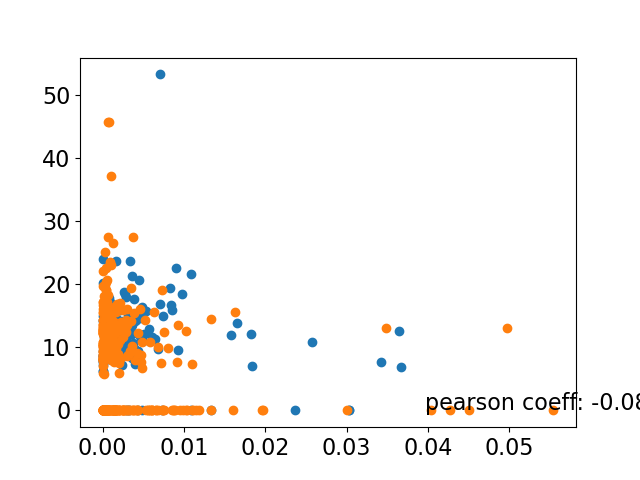

In [29]:
%matplotlib widget

# had to skip plotting the 150 to 200 indices due to some issue in the data
plt.scatter(x[:150], y[:150])
plt.scatter(x[200:], y[200:])
#plt.title("logging deforestation vs neighbors deforestation")
plt.text(s="pearson coeff: " + str(round(stats.pearsonr(x, y)[0],3)), x=max(x*5/7), y=0)
plt.show()

# oil palm

TODO: repeat above analysis for oil palm concessions

In [ ]:
oilpalm_gdf = gpd.read_file("data/Greenpeace_Indonesia_Oil_Palm_Concessions_Map_Nov_2020.shp")


# multiple linear regression analysis

### correlation matrix

In [30]:
data = pd.read_csv("outputs/features_by_logging_concession_new.csv")
data.columns
data = data.loc[:, ['area', 'slope', 'elev', 'distroad', 'distcapital', 'peatdepth', 'soilcarbon', \
       'biomasscarbonruesch', 'biomasscarbonbaccini', 'degree', 'years_in_effect', 'defor_cumul_prop_avg']]

print(len(data))
print(len(data.dropna()))
# we drop 62 concessions for having incomplete data, leaving 495 (of 557) remaining

data = data.dropna()

557
495


Index(['area', 'slope', 'elev', 'distroad', 'distcapital', 'peatdepth',
       'soilcarbon', 'biomasscarbonruesch', 'biomasscarbonbaccini', 'degree',
       'years_in_effect', 'deforestation'],
      dtype='object')


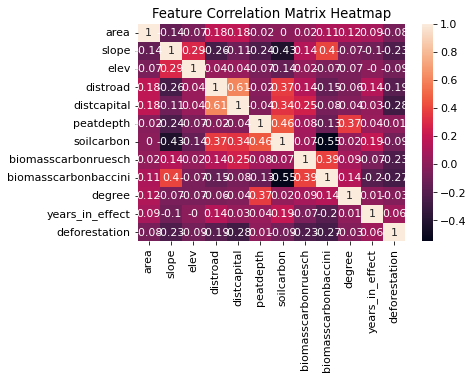

In [36]:
# make correlation heatmap of all features under consideration

data.rename(columns = {'defor_cumul_prop_avg': 'deforestation'}, inplace=True)
print(data.columns)

normalized_data =(data-data.mean())/data.std()
normalized_corr_matrix = normalized_data.corr()

%matplotlib inline
plt.rcParams.update({'font.size': 11})
plt.rc('figure', titlesize=18)

plt.title("Feature Correlation Matrix Heatmap")
sn.heatmap(normalized_corr_matrix.round(2), annot=True)
# plt.tight_layout()
plt.show()

# corr_matrix.loc['defor_cumul_prop_avg']

In [38]:
normalized_corr_matrix

,area,slope,elev,distroad,distcapital,peatdepth,soilcarbon,biomasscarbonruesch,biomasscarbonbaccini,degree,years_in_effect,deforestation
area,1.000000,-0.141027,-0.071073,0.184990,0.180477,-0.024387,0.003568,0.024398,0.107218,0.124929,0.086461,-0.084400
slope,-0.141027,1.000000,0.288918,-0.258030,-0.111566,-0.241719,-0.434698,0.139428,0.396379,-0.069594,-0.102370,-0.226863
elev,-0.071073,0.288918,1.000000,0.039842,0.037930,-0.072770,-0.144273,0.023725,-0.069592,-0.069337,-0.003270,-0.091254
distroad,0.184990,-0.258030,0.039842,1.000000,0.614633,-0.018992,0.369383,0.144448,-0.154548,-0.058319,0.138880,-0.189290
distcapital,0.180477,-0.111566,0.037930,0.614633,1.000000,-0.044821,0.343740,0.248872,-0.080005,-0.040990,0.027798,-0.283690
peatdepth,-0.024387,-0.241719,-0.072770,-0.018992,-0.044821,1.000000,0.461735,0.081803,-0.131393,0.374358,0.036040,0.006626
soilcarbon,0.003568,-0.434698,-0.144273,0.369383,0.343740,0.461735,1.000000,0.072871,-0.550058,0.024576,0.191440,-0.094148
biomasscarbonruesch,0.024398,0.139428,0.023725,0.144448,0.248872,0.081803,0.072871,1.000000,0.385766,0.090827,-0.073331,-0.229213
biomasscarbonbaccini,0.107218,0.396379,-0.069592,-0.154548,-0.080005,-0.131393,-0.550058,0.385766,1.000000,0.140479,-0.198040,-0.266837
degree,0.124929,-0.069594,-0.069337,-0.058319,-0.040990,0.374358,0.024576,0.090827,0.140479,1.000000,0.013897,-0.031834


In [40]:
print("sorted order: feature vs deforestation correlation")
normalized_corr_matrix['deforestation'].sort_values()

sorted order: feature vs deforestation correlation


distcapital            -0.283690
biomasscarbonbaccini   -0.266837
biomasscarbonruesch    -0.229213
slope                  -0.226863
distroad               -0.189290
soilcarbon             -0.094148
elev                   -0.091254
area                   -0.084400
degree                 -0.031834
peatdepth               0.006626
years_in_effect         0.062460
deforestation           1.000000
Name: deforestation, dtype: float64

### Analysis of results of correlation matrix:
* the following are dependent variable pairs with relatively higher correlations (would need to check p-values for significance): 
    * elev, slope: 0.29
    * distroad, slope: -.26
    * distcapital, distroad: 0.62
    * peatdepth, slope: -.24
    * soilcarbon, slope: -.43
    * soilcarbon, distroad: .37
    * soilcarbon, distcapital: .34
    * soilcarbon, peatdepth: .46
    * biomasscarbonruesch, distcapital: .25
    * biomasscarbonbaccini, slope: .40
    * biomasscarbonbaccini, biomasscarbonruesch: .39
    * biomasscarbonbaccini, soilcarbon: -.55
    * degree, peatdepth: .37
    * years_in_effect, soilcarbon: .28
    * deforestation, slope: -.23
    * deforestation, distcapital: -.28
    * deforestation, biomasscarbonruesch: -.23
    * deforestation, biomasscarbonbaccini: -.27


### perform multiple regression

- the following cells experiment with different combinations of dependent features to build the best OLS model 
- cell 43, using ['area', 'slope', 'distcapital', 'biomasscarbonruesch', 'soilcarbon'], has best results

note: OLS and correlation are scale invariant

In [13]:
import statsmodels.api as sm

def run_OLS(X, Y):
    X = sm.add_constant(X) #

    model = sm.OLS(Y, X).fit()

    print("RSS: ", round(model.ssr, 3))
    return model.summary() 

notes: 
- report on conf interval, p value, quick interpretation of coefs
- try with absolute deforestation instead of proportion too
- capture neighbor effect via using (sum of neighbors) <-- might just reflect that the area is popular for logging
                            or (average defor of neighbors) <-- captures network effect more

In [42]:
X = normalized_data.loc[:, ['distcapital', 'biomasscarbonbaccini', 'slope', 'soilcarbon']] # top 4 distinct
Y = normalized_data.loc[:, 'deforestation']
run_OLS(X, Y)

RSS:  370.825


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          deforestation   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     40.69
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.89e-29
Time:                        10:39:00   Log-Likelihood:                -630.89
No. Observations:                 495   AIC:                             1272.
Df Residuals:                     490   BIC:                             1293.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.393e-16      0.039   3.56e-15      1.000      -0.077       0.077
distcapital             -0.2292      0.042     -5.445      0.000      -0.312      -0.146
biomasscarbonbaccini    -0.3649      0.048     -7.547      0.000      -0.460      -0.270
slope                   -0.2487      0.044     -5.596      0.000      -0.336      -0.161
soilcarbon              -0.3242      0.052     -6.214      0.000      -0.427      -0.222
==============================================================================
Omnibus:                      395.947   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7235.723
Skew:                           3.419   Prob(JB):                         0.00
Kurtosis:                      20.437   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
X = normalized_data.loc[:, ['distroad', 'biomasscarbonbaccini', 'slope', 'soilcarbon']] # another top 4 combo
Y = normalized_data.loc[:, 'deforestation']
run_OLS(X, Y)

# good. same as 1 but swapped distcapital for distroad

RSS:  378.351


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     defor_cumul_prop_avg   R-squared:                       0.234
Model:                              OLS   Adj. R-squared:                  0.228
Method:                   Least Squares   F-statistic:                     37.44
Date:                  Tue, 11 Apr 2023   Prob (F-statistic):           2.44e-27
Time:                          01:13:17   Log-Likelihood:                -635.86
No. Observations:                   495   AIC:                             1282.
Df Residuals:                       490   BIC:                             1303.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.393e-16      0.039   3.53e-15      1.000      -0.078       0.078
distroad                -0.1890      0.043     -4.394      0.000      -0.273      -0.104
biomasscarbonbaccini    -0.3807      0.049     -7.833      0.000      -0.476      -0.285
slope                   -0.2791      0.045     -6.161      0.000      -0.368      -0.190
soilcarbon              -0.3551      0.052     -6.858      0.000      -0.457      -0.253
==============================================================================
Omnibus:                      391.801   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6921.993
Skew:                           3.381   Prob(JB):                         0.00
Kurtosis:                      20.026   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X = normalized_data.loc[:, ['distcapital', 'biomasscarbonbaccini', 'slope', 'peatdepth']]
Y = normalized_data.loc[:, 'deforestation']
run_OLS(X, Y)

# fine, worse than others. same as 1 but replace soilcarbon with peatdepth. not sure if i should present this bc 
# peatdepth isnt too well correlated independently and is still kind of weak here

RSS:  396.726


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     defor_cumul_prop_avg   R-squared:                       0.197
Model:                              OLS   Adj. R-squared:                  0.190
Method:                   Least Squares   F-statistic:                     30.04
Date:                  Tue, 11 Apr 2023   Prob (F-statistic):           2.29e-22
Time:                          00:13:56   Log-Likelihood:                -647.60
No. Observations:                   495   AIC:                             1305.
Df Residuals:                       490   BIC:                             1326.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.393e-16      0.040   3.44e-15      1.000      -0.079       0.079
distcapital             -0.3273      0.041     -8.005      0.000      -0.408      -0.247
biomasscarbonbaccini    -0.2274      0.044     -5.147      0.000      -0.314      -0.141
slope                   -0.1937      0.045     -4.275      0.000      -0.283      -0.105
peatdepth               -0.0847      0.042     -2.024      0.044      -0.167      -0.002
==============================================================================
Omnibus:                      406.184   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7529.868
Skew:                           3.551   Prob(JB):                         0.00
Kurtosis:                      20.739   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X = normalized_data.loc[:, ['elev', 'slope', 'distcapital', 'soilcarbon', 'biomasscarbonbaccini']]
Y = normalized_data.loc[:, 'deforestation']
run_OLS(X, Y)

# also good, better than below i think
# same as below but replace area with elev. using both area + elev make the model worse
# this has best RSS and log likelihood and R^2

RSS:  366.82


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     defor_cumul_prop_avg   R-squared:                       0.257
Model:                              OLS   Adj. R-squared:                  0.250
Method:                   Least Squares   F-statistic:                     33.91
Date:                  Wed, 12 Apr 2023   Prob (F-statistic):           9.51e-30
Time:                          05:13:17   Log-Likelihood:                -628.20
No. Observations:                   495   AIC:                             1268.
Df Residuals:                       489   BIC:                             1294.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.393e-16      0.039   3.58e-15      1.000      -0.076       0.076
elev                    -0.0978      0.042     -2.310      0.021      -0.181      -0.015
slope                   -0.2162      0.046     -4.654      0.000      -0.307      -0.125
distcapital             -0.2172      0.042     -5.142      0.000      -0.300      -0.134
soilcarbon              -0.3449      0.053     -6.542      0.000      -0.448      -0.241
biomasscarbonbaccini    -0.3950      0.050     -7.920      0.000      -0.493      -0.297
==============================================================================
Omnibus:                      396.686   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7334.555
Skew:                           3.424   Prob(JB):                         0.00
Kurtosis:                      20.571   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X = normalized_data.loc[:, ['area', 'slope', 'distcapital', 'biomasscarbonruesch', 'soilcarbon']]
Y = normalized_data.loc[:, 'deforestation']
run_OLS(X, Y)

# good results


RSS:  404.376


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     defor_cumul_prop_avg   R-squared:                       0.181
Model:                              OLS   Adj. R-squared:                  0.173
Method:                   Least Squares   F-statistic:                     21.68
Date:                  Tue, 11 Apr 2023   Prob (F-statistic):           1.27e-19
Time:                          01:14:04   Log-Likelihood:                -652.33
No. Observations:                   495   AIC:                             1317.
Df Residuals:                       489   BIC:                             1342.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.393e-16      0.041   3.41e-15      1.000      -0.080       0.080
area                   -0.0841      0.042     -1.989      0.047      -0.167      -0.001
slope                  -0.3093      0.047     -6.592      0.000      -0.402      -0.217
distcapital            -0.2248      0.046     -4.915      0.000      -0.315      -0.135
biomasscarbonruesch    -0.1177      0.043     -2.738      0.006      -0.202      -0.033
soilcarbon             -0.1425      0.049     -2.929      0.004      -0.238      -0.047
==============================================================================
Omnibus:                      412.420   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7572.115
Skew:                           3.641   Prob(JB):                         0.00
Kurtosis:                      20.723   Cond. No.                         1.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
distcapital            -0.283690
biomasscarbonbaccini   -0.266837
biomasscarbonruesch    -0.229213
slope                  -0.226863
distroad               -0.189290
soilcarbon             -0.094148
elev                   -0.091254
area                   -0.084400
degree                 -0.031834
year                   -0.015574
peatdepth               0.006626
defor_cumul_prop_avg    1.000000
"""